In [1]:
import pandas as pd

pd.options.mode.chained_assignment = None

In [2]:
from blocks.get_raw_df import get_raw_df

2024-10-10 00:20:55,805 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2024-10-10 00:20:55,808 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-10 00:20:55,833 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2024-10-10 00:20:55,833 INFO sqlalchemy.engine.Engine [raw sql] {}
2024-10-10 00:20:55,876 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2024-10-10 00:20:55,880 INFO sqlalchemy.engine.Engine [raw sql] {}


In [3]:
import numpy as np

In [4]:
df = get_raw_df()

2024-10-10 00:20:56,143 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2024-10-10 00:20:56,145 INFO sqlalchemy.engine.Engine select * from ane_base.parser_app_pricesraw
2024-10-10 00:20:56,147 INFO sqlalchemy.engine.Engine [raw sql] {}


In [5]:
site_links_end = df[df.date=='2024-10-09'].site_link.unique()
site_links_start = df[df.date=='2019-01-31'].site_link.unique()
site_links = np.intersect1d(site_links_start, site_links_end)
raw_df = df[df.site_link.isin(site_links)]

raw_df['median_price'] = raw_df.groupby(['date', 'category_id'])['price_new'].transform(lambda x: x.median())
raw_df['price_ratio'] = raw_df.price_new / raw_df.median_price
raw_df = raw_df.sort_values('date').reset_index(drop=True)
raw_df['is_price_change'] = raw_df.groupby('site_link')['price_new'].transform(lambda x: (x.pct_change()!=0)&(x.pct_change().notna()))

raw_df = raw_df[['date', 'price_new', 'price_old', 
                 'site_link', 'median_price', 'price_ratio', 'is_price_change']]

In [6]:
raw_df = raw_df.set_index('date')

In [7]:
raw_df.price_old = raw_df.price_old.astype(float)

In [8]:
raw_df.loc[raw_df.price_old!=-1, 'price_new'] = None
raw_df['price_new'] = raw_df.groupby('site_link')['price_new'].ffill()

<Axes: xlabel='date'>

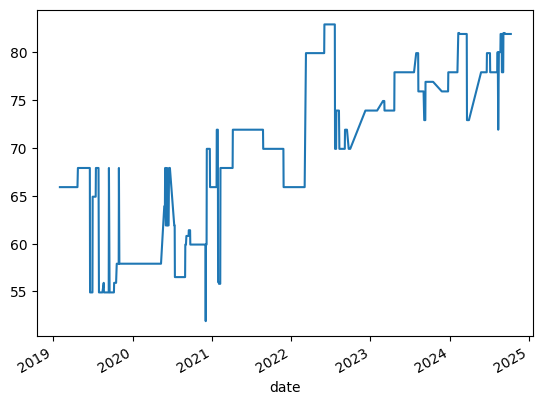

In [9]:
cond1 = raw_df.site_link.str.startswith('https://www.vprok.ru/product/ryazanochka-ryaza')
raw_df[cond1]['price_new'].plot()

C:\Users\user\AppData\Local\Temp\ipykernel_7692\4066887170.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  raw_df[raw_df.date.between('2019-11-30', '2020-06-30')].groupby('date').apply(lambda x: x.is_price_change.sum()/x.is_price_change.count()).rolling(20).mean().plot()


<Axes: xlabel='date'>

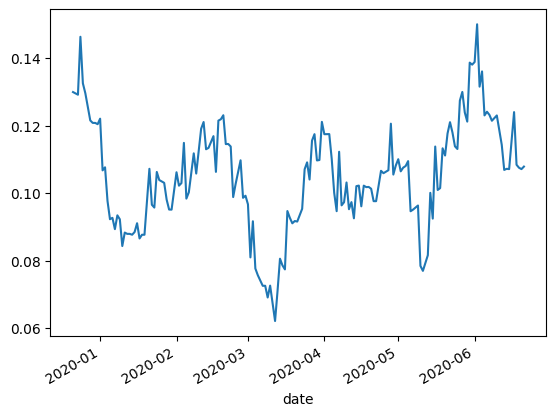

In [40]:
raw_df[raw_df.date.between('2019-11-30', '2020-06-30')].groupby('date').apply(lambda x: x.is_price_change.sum()/x.is_price_change.count()).rolling(20).mean().plot()

In [42]:
raw_df['price_pct_change'] = raw_df.groupby('site_link')['price_new'].transform(lambda x: x.pct_change())

C:\Users\user\AppData\Local\Temp\ipykernel_7692\4214080345.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  raw_df[raw_df.date.between('2022-01-01', '2022-12-31')].groupby('date').apply(lambda x: x[x.price_pct_change>0].is_price_change.sum()/x.is_price_change.count()).rolling(15).mean().plot()


<Axes: xlabel='date'>

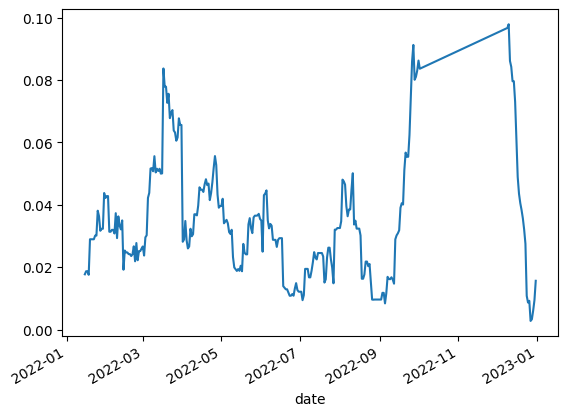

In [45]:
raw_df[raw_df.date.between('2022-01-01', '2022-12-31')].groupby('date').apply(lambda x: x[x.price_pct_change>0].is_price_change.sum()/x.is_price_change.count()).rolling(15).mean().plot()

C:\Users\user\AppData\Local\Temp\ipykernel_7692\2306539875.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  raw_df[raw_df.date.between('2021-01-01', '2021-12-31')].groupby('date').apply(lambda x: x[x.price_pct_change>0].is_price_change.sum()/x.is_price_change.count()).rolling(15).mean().plot()


<Axes: xlabel='date'>

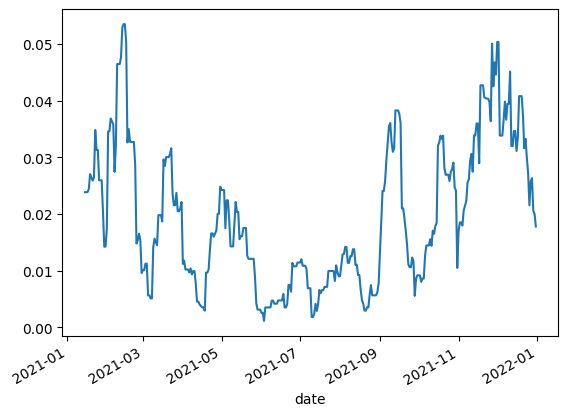

In [48]:
raw_df[raw_df.date.between('2021-01-01', '2021-12-31')].groupby('date').apply(lambda x: x[x.price_pct_change>0].is_price_change.sum()/x.is_price_change.count()).rolling(15).mean().plot()

C:\Users\user\AppData\Local\Temp\ipykernel_7692\3780304096.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  raw_df[raw_df.date.between('2020-01-01', '2020-12-31')].groupby('date').apply(lambda x: x[x.price_pct_change>0].is_price_change.sum()/x.is_price_change.count()).rolling(15).mean().plot()


<Axes: xlabel='date'>

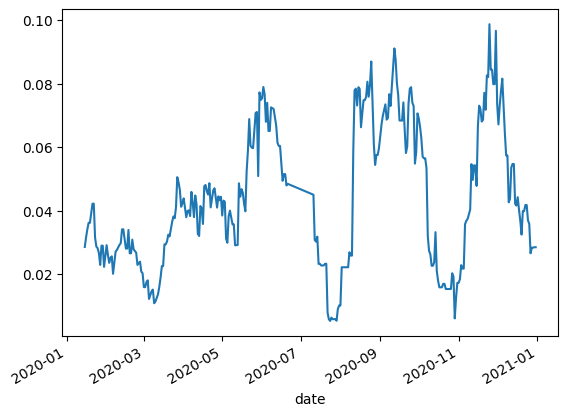

In [51]:
raw_df[raw_df.date.between('2020-01-01', '2020-12-31')].groupby('date').apply(lambda x: x[x.price_pct_change>0].is_price_change.sum()/x.is_price_change.count()).rolling(15).mean().plot()

C:\Users\user\AppData\Local\Temp\ipykernel_7692\3625172500.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  raw_df[raw_df.date.between('2022-01-01', '2022-12-31')].groupby('date').apply(lambda x: x[x.price_pct_change<0].is_price_change.sum()/x.is_price_change.count()).rolling(15).mean().plot()


<Axes: xlabel='date'>

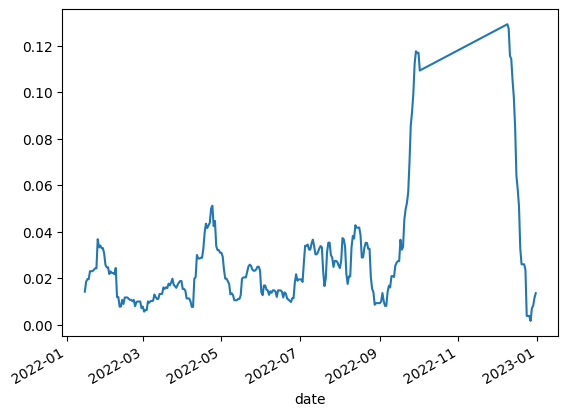

In [47]:
raw_df[raw_df.date.between('2022-01-01', '2022-12-31')].groupby('date').apply(lambda x: x[x.price_pct_change<0].is_price_change.sum()/x.is_price_change.count()).rolling(15).mean().plot()

C:\Users\user\AppData\Local\Temp\ipykernel_7692\2814690826.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  raw_df[raw_df.date.between('2021-01-01', '2021-06-30')].groupby('date').apply(lambda x: x.is_price_change.sum()/x.is_price_change.count()).rolling(10).median().plot()


<Axes: xlabel='date'>

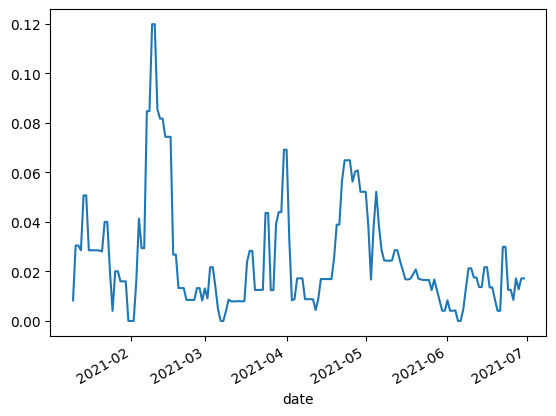

In [31]:
raw_df[raw_df.date.between('2021-01-01', '2021-06-30')].groupby('date').apply(lambda x: x.is_price_change.sum()/x.is_price_change.count()).rolling(10).median().plot()

In [19]:
raw_df.loc[:, 'date'] = raw_df.index

In [23]:
raw_df.index.name = 'index'

In [27]:
raw_df.date = pd.Series(index=raw_df.index, data=raw_df.date)